In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [20]:
from sklearn.preprocessing import StandardScaler
recipes = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
target = recipes['cake']
feats = recipes.drop(columns=['cake'])
numeric_cols = feats.select_dtypes(include=['number']).columns
means = feats[numeric_cols].mean()
feats[numeric_cols] = feats[numeric_cols].fillna(means)
feats[numeric_cols] = feats[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())
tensor_data = torch.tensor(feats[numeric_cols].values, dtype=torch.float32)
target_data = torch.tensor(target.values, dtype=torch.float32)

tensor_data, target_data

(tensor([[-0.9058, -0.0184, -0.0205,  ..., -0.0374, -0.0308,  6.5553],
         [ 0.4926, -0.0185, -0.0240,  ..., -0.0374, -0.0308, -0.1525],
         [ 0.0265, -0.0192, -0.0275,  ..., -0.0374, -0.0308, -0.1525],
         ...,
         [ 0.4926, -0.0180, -0.0202,  ..., -0.0374, -0.0308,  6.5553],
         [ 0.4926, -0.0178, -0.0161,  ..., -0.0374, -0.0308, -0.1525],
         [ 0.4926, -0.0180, -0.0079,  ..., -0.0374, -0.0308, -0.1525]]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]))

In [24]:
recipes = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
target = recipes['cake']
feats = recipes.drop(columns=['cake'])
numeric_cols = feats.select_dtypes(include=['number']).columns
medians = feats[numeric_cols].median()
titles = feats['title']
feats = feats[numeric_cols].fillna(medians)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(feats)
tensor_data = torch.tensor(numeric_data_scaled, dtype=torch.float)
target_data = torch.tensor(target.values, dtype=torch.float)
tensor_data, target_data

(tensor([[-9.0578e-01, -1.4580e-02, -1.4927e-02,  ..., -3.7394e-02,
          -3.0797e-02,  6.5554e+00],
         [ 4.9264e-01, -1.4652e-02, -1.8437e-02,  ..., -3.7394e-02,
          -3.0797e-02, -1.5255e-01],
         [ 2.6501e-02, -1.5396e-02, -2.1947e-02,  ..., -3.7394e-02,
          -3.0797e-02, -1.5255e-01],
         ...,
         [ 4.9264e-01, -1.4152e-02, -1.4635e-02,  ..., -3.7394e-02,
          -3.0797e-02,  6.5554e+00],
         [ 4.9264e-01, -1.3940e-02, -1.0540e-02,  ..., -3.7394e-02,
          -3.0797e-02, -1.5255e-01],
         [ 4.9264e-01, -1.4162e-02, -2.3494e-03,  ..., -3.7394e-02,
          -3.0797e-02, -1.5255e-01]]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]))

In [25]:
import torch.nn as nn
import torch.optim as optim

class AutoEncoder(nn.Module):
    def __init__(self, input_size, encoding_dim=10):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),  # First hidden layer
            nn.ReLU(True),
            nn.Linear(128, 64),          # Second hidden layer
            nn.ReLU(True),
            nn.Linear(64, encoding_dim)  # Compressed representation
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, input_size),  # Reconstruction of input
            nn.Tanh()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded 

In [30]:
input_size = feats.shape[1]
model = AutoEncoder(input_size=input_size)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

dataset = TensorDataset(tensor_data, target_data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

num_epochs = 500 

for epoch in range(num_epochs):
    for data in dataloader:
        inputs = data[0]
        encoded, decoded = model(inputs) 
        loss = criterion(decoded, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [54]:
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
target = df['cake']
feats = df.drop(columns=['cake', 'title'])

# Select numeric columns and fill missing values with medians
numeric_cols = feats.select_dtypes(include=['number']).columns
means = feats[numeric_cols].mean()
feats[numeric_cols] = feats[numeric_cols].fillna(means)

# Standardize numeric columns
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(feats[numeric_cols])

# Convert DataFrame to torch tensor
tensor_data = torch.tensor(numeric_data_scaled, dtype=torch.float32)
target_data = torch.tensor(target.values, dtype=torch.float32).reshape(-1, 1)

# Create a DataLoader
batch_size = 32
dataset = TensorDataset(tensor_data, target_data) 
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(tensor_data.shape[1], 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Linear(32, 10) 
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(True),
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, tensor_data.shape[1]),
            nn.Tanh()  
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create instances of the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Train the model and track the loss
num_epochs = 50
losses = []
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')




Epoch [1/50], Loss: 1.0973
Epoch [2/50], Loss: 0.4744
Epoch [3/50], Loss: 0.8066
Epoch [4/50], Loss: 0.6148
Epoch [5/50], Loss: 0.6224
Epoch [6/50], Loss: 0.9550
Epoch [7/50], Loss: 0.8104
Epoch [8/50], Loss: 0.6519
Epoch [9/50], Loss: 0.9538
Epoch [10/50], Loss: 0.4039


KeyboardInterrupt: 

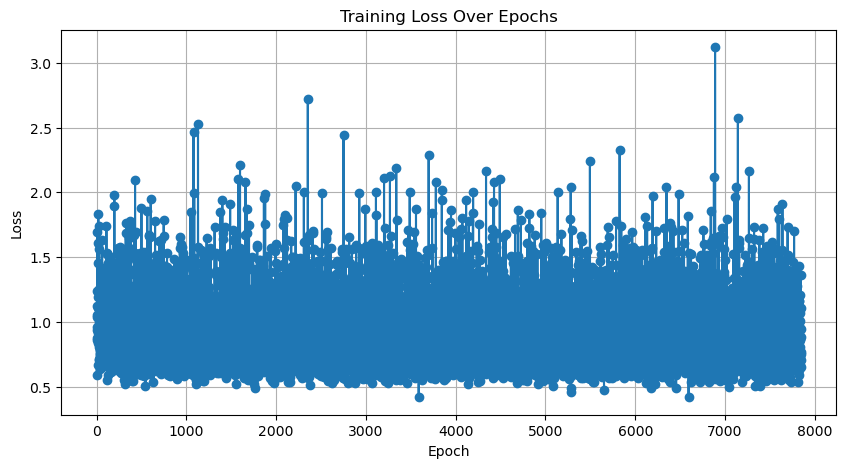

In [50]:
# Plot the loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()